# Normalization
why?
- Larger magnitude features dominate
- Distance-based models become biased
- Gradient descent becomes unstable

## Required
for

- Linear Regression
- Logistic Regression
- KNN
- SVM
- Neural Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_openml
churn_data = fetch_openml(name="Telco-Customer-Churn", version=1, as_frame=True)
df = churn_data.frame
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

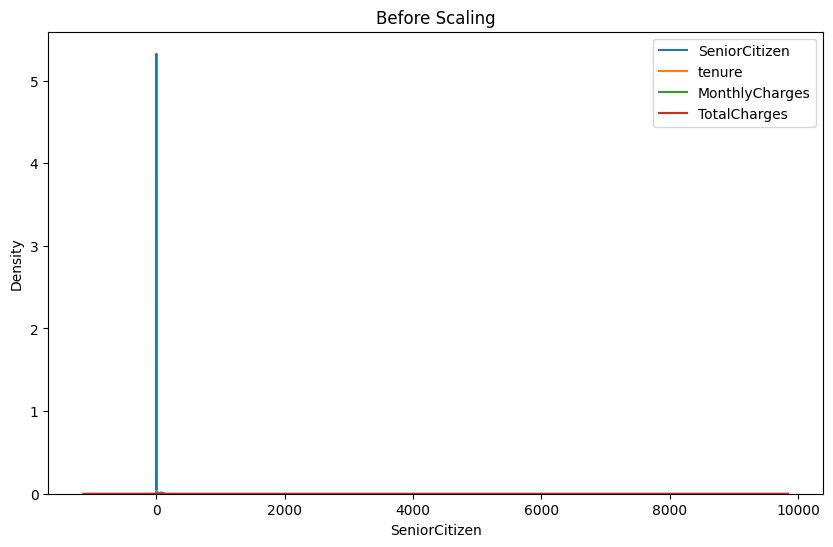

In [2]:
plt.figure(figsize=(10,6))

for col in num_cols:
    sns.kdeplot(df[col], label=col)

plt.legend()
plt.title("Before Scaling")
plt.show()

## Min-Max Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_minmax = df.copy()
df_minmax[num_cols] = scaler.fit_transform(df[num_cols])

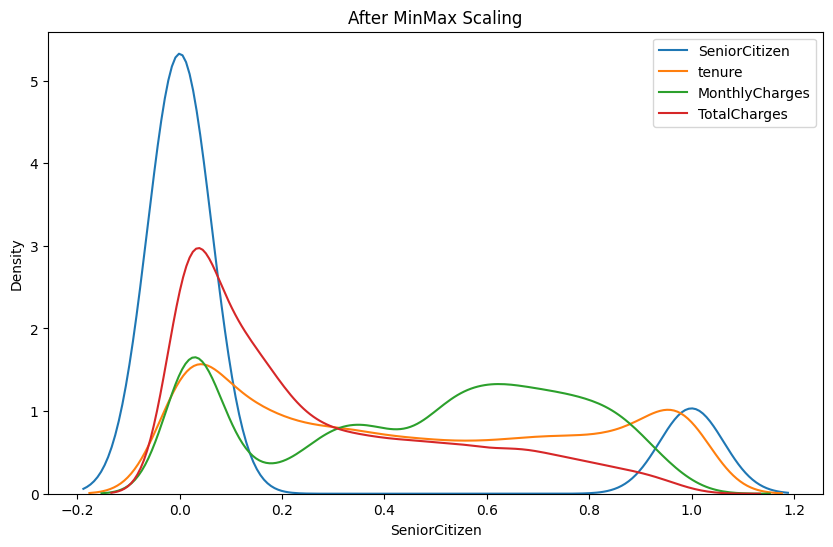

In [4]:
plt.figure(figsize=(10,6))

for col in num_cols:
    sns.kdeplot(df_minmax[col], label=col)

plt.legend()
plt.title("After MinMax Scaling")
plt.show()

## Z-Score Scaling / Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_standard = df.copy()
df_standard[num_cols] = scaler.fit_transform(df[num_cols])

In [7]:
df_standard[num_cols].mean()
df_standard[num_cols].std()

,0
SeniorCitizen,1.000071
tenure,1.000071
MonthlyCharges,1.000071
TotalCharges,1.000071


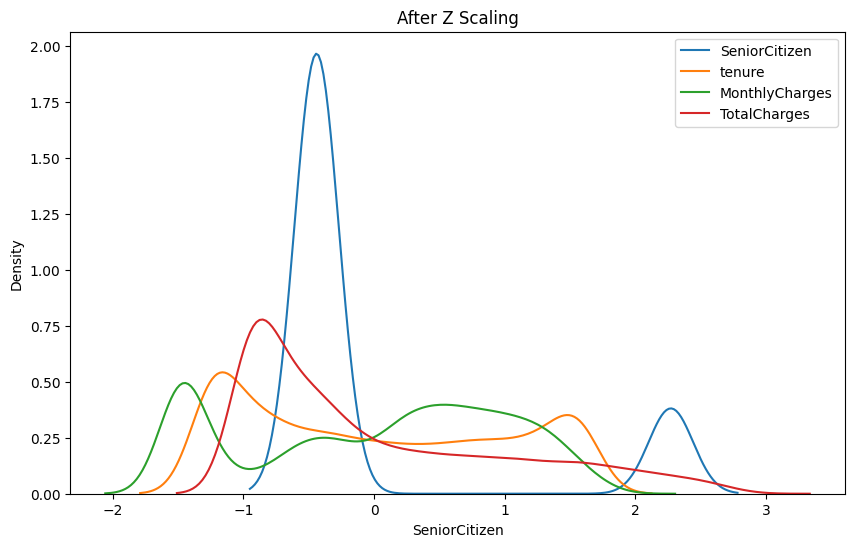

In [8]:
plt.figure(figsize=(10,6))

for col in num_cols:
    sns.kdeplot(df_standard[col], label=col)

plt.legend()
plt.title("After Z Scaling")
plt.show()

## Robust Scaling
Best; uses IQR + Mean

In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_robust = df.copy()
df_robust[num_cols] = scaler.fit_transform(df[num_cols])

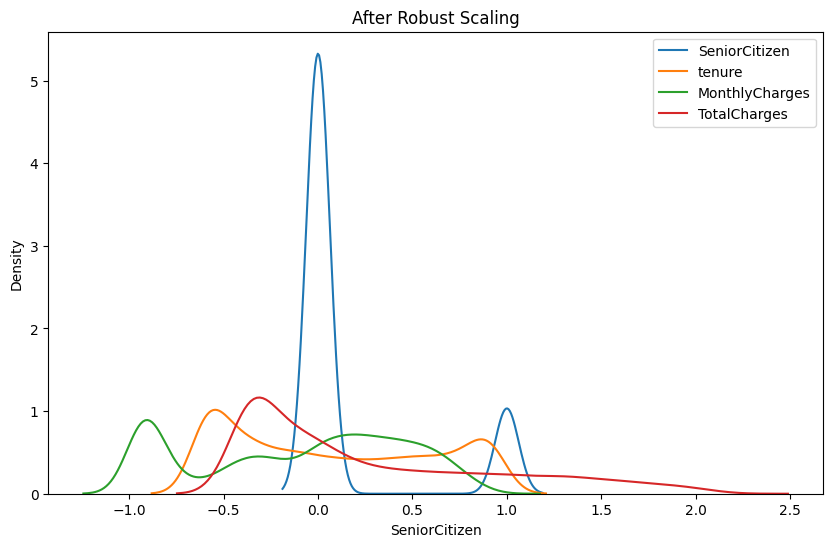

In [10]:
plt.figure(figsize=(10,6))

for col in num_cols:
    sns.kdeplot(df_robust[col], label=col)

plt.legend()
plt.title("After Robust Scaling")
plt.show()

## Max Absolute Scaling

In [11]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()

df_maxabs = df.copy()
df_maxabs[num_cols] = scaler.fit_transform(df[num_cols])

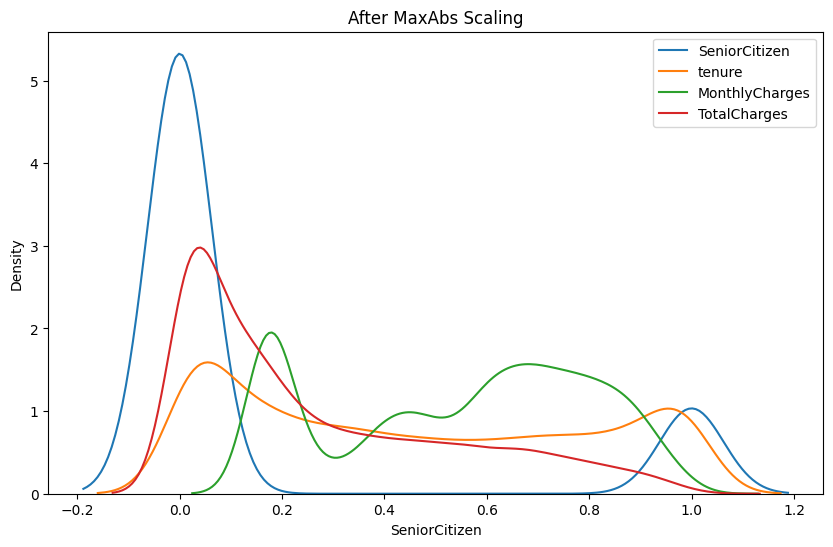

In [12]:
plt.figure(figsize=(10,6))

for col in num_cols:
    sns.kdeplot(df_maxabs[col], label=col)

plt.legend()
plt.title("After MaxAbs Scaling")
plt.show()

## Power Transformation

In [15]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df_power = df.copy()
df_power[num_cols] = pt.fit_transform(df[num_cols])



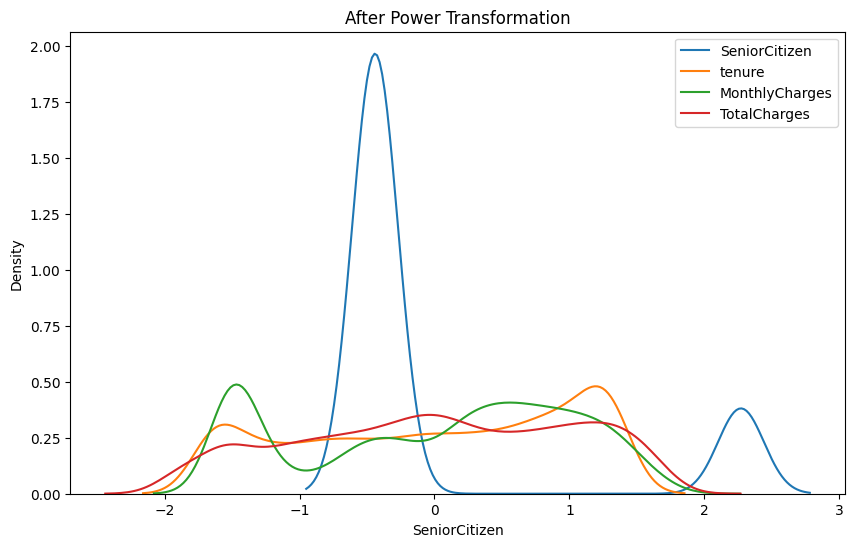

In [16]:
plt.figure(figsize=(10,6))

for col in num_cols:
    sns.kdeplot(df_power[col], label=col)

plt.legend()
plt.title("After Power Transformation")
plt.show()